In [1]:
#!pip install -e ..

In [2]:
#! pip install pandas

In [3]:
import pandas as pd

sp500 = pd.read_csv('../data/sp500_data_100_years.csv', parse_dates=True)
sp500 = sp500.drop(columns=['High', 'Low', 'Open', 'Volume', 'Dividends', 'Stock Splits'])
sp500['Date'] = pd.to_datetime(sp500['Date'])
sp500.set_index('Date', inplace=True)
sp500 = sp500.dropna()

C:\Users\danie\AppData\Local\Temp\ipykernel_17112\2137003916.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  sp500['Date'] = pd.to_datetime(sp500['Date'])


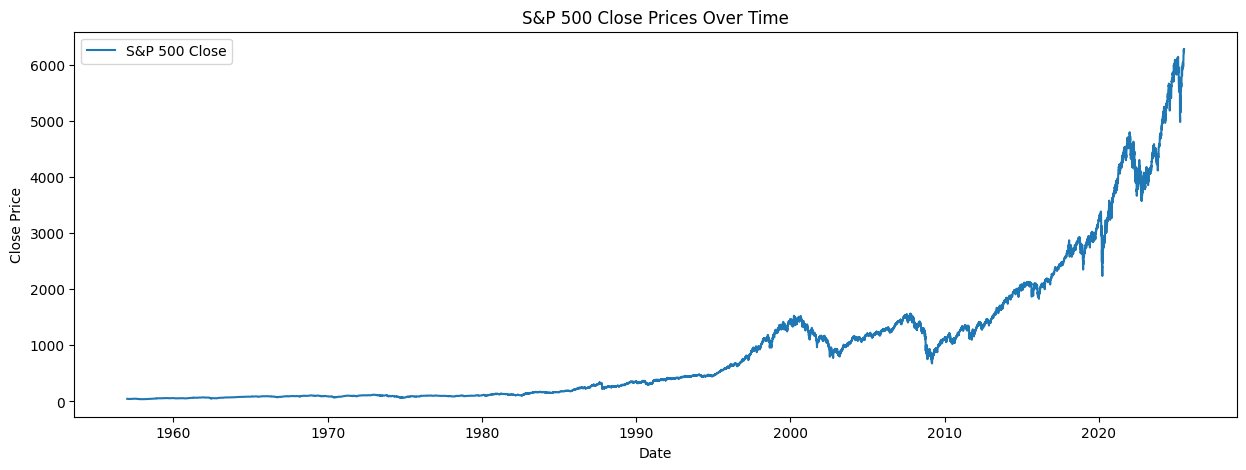

In [4]:
import matplotlib.pyplot as plt
sp500 = sp500[sp500.index > pd.to_datetime('1957-01-01', utc=True)]

plt.figure(figsize=(15, 5))
plt.plot(sp500.index, sp500['Close'], label='S&P 500 Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P 500 Close Prices Over Time')
plt.legend()
plt.show()

In [5]:
sp500_opens_np = sp500['Close'].to_numpy(dtype=float)

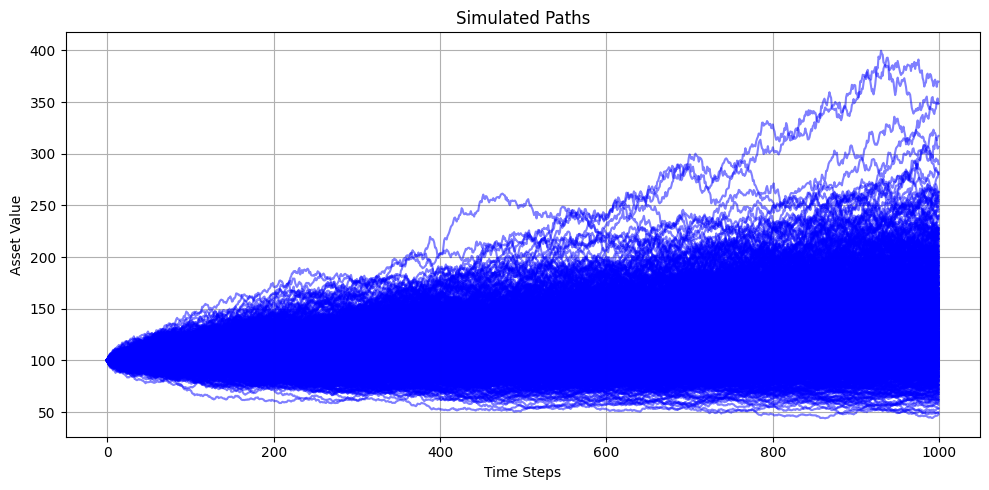

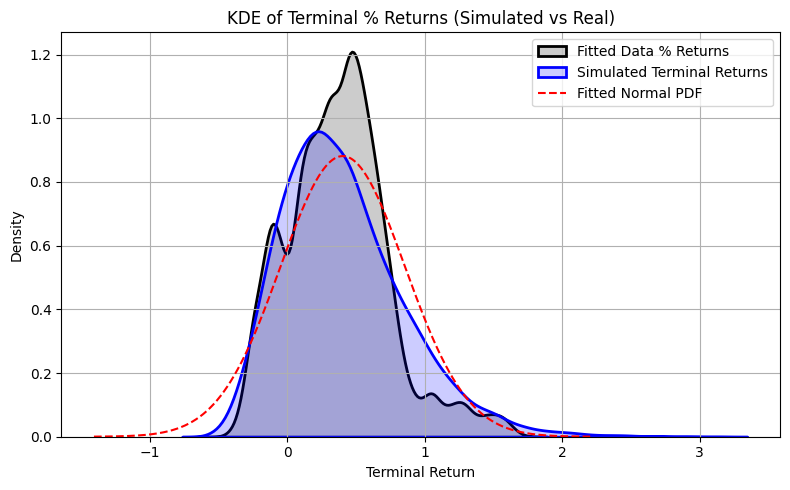

In [6]:
import marketModelsFactory as mmf

model = mmf.models.GeometricBrownianMotion()

model.fit(sp500_opens_np)

# Simulate data
paths = model.generate_synthetic_data(n_paths=10000, n_steps=1000)

# Visualize
model.plot_paths(paths, n_paths=1000)
model.plot_histogram(paths, nbins=50, fit_normal=True, data_fit=sp500_opens_np)